# CSE 5524 HW  Utkarsh Pratap Singh Jadon

## Question1

### Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
import cv2 as cv
import numpy as np
import math
from PIL import Image
import glob
import os
import skimage
from os import listdir
from os.path import join, isfile
from skimage import morphology
from skimage import measure,color
from skimage import io, data 
from numpy.linalg import eig

### Read and normalise input grayscale images

In [2]:
#Following section reads input Grayscale box images
boxImage1Gray = skimage.io.imread(fname="boxIm1.bmp")
boxImage2Gray = skimage.io.imread(fname="boxIm2.bmp")
boxImage3Gray = skimage.io.imread(fname="boxIm3.bmp")
boxImage4Gray = skimage.io.imread(fname="boxIm4.bmp")

#Following section plots all 4 grayscale images(Commented out as not required)
# plt.subplot(2,2,1)
# plt.imshow(boxImage1Gray, cmap="gray")
# plt.subplot(2,2,2)
# plt.imshow(boxImage2Gray, cmap="gray")
# plt.subplot(2,2,3)
# plt.imshow(boxImage3Gray, cmap="gray")
# plt.subplot(2,2,4)
# plt.imshow(boxImage4Gray, cmap="gray")

#Normalizing input grayscale images to get range 0-1
boxImage1Normalised = boxImage1Gray / 255
boxImage2Normalised = boxImage2Gray / 255
boxImage3Normalised = boxImage3Gray / 255
boxImage4Normalised = boxImage4Gray / 255

### Create function to compute 7 similitude moment shape descriptors

In [3]:
def similitudeMoments(inputImage):
    
    a,b = inputImage.shape
    x=0
    y=0
    m10 = 0
    m01 = 0
    m00 = 0
    centroidX = 0
    centroidY = 0
    for x in range(a):
        for y in range(b):
                m10 += (x**1)*(y**0)*inputImage[x,y]
                m01 += (x**0)*(y**1)*inputImage[x,y]
                m00 += (x**0)*(y**0)*inputImage[x,y]
    
    centroidX = (m10) / (m00)
    centroidY = (m01) / (m00)
    
    # For similitudeMoment1, p=0, q=2
    # For similitudeMoment2, p=0, q=3
    # For similitudeMoment3, p=1, q=1
    # For similitudeMoment4, p=1, q=2
    # For similitudeMoment5, p=2, q=0
    # For similitudeMoment6, p=2, q=1
    # For similitudeMoment7, p=3, q=0
    
    N = np.array([[0,2],[0,3],[1,1],[1,2],[2,0],[2,1],[3,0]])
    numerator1 = 0
    denominator1 = 0
    numerator2 = 0
    denominator2 = 0
    numerator3 = 0
    denominator3 = 0
    numerator4 = 0
    denominator4 = 0
    numerator5 = 0
    denominator5 = 0
    numerator6 = 0
    denominator6 = 0
    numerator7 = 0
    denominator7 = 0
    #print(N)
    for x in range(a):
        for y in range(b):
                numerator1 += ((x - centroidX)**N[0,0]) * ((y - centroidY)**N[0,1]) * inputImage[x,y]
                denominator1 = (m00)**(((N[0,0] + N[0,1]) / 2) + 1)
            
                numerator2 += ((x - centroidX)**N[1,0]) * ((y - centroidY)**N[1,1]) * inputImage[x,y]
                denominator2 = (m00)**(((N[1,0] + N[1,1] / 2)) + 1)
                
                numerator3 += ((x - centroidX)**N[2,0]) * ((y - centroidY)**N[2,1]) * inputImage[x,y]
                denominator3 = (m00)**(((N[2,0] + N[2,1]) / 2) + 1)
                
                numerator4 += ((x - centroidX)**N[3,0]) * ((y - centroidY)**N[3,1]) * inputImage[x,y]
                denominator4 = (m00)**(((N[3,0] + N[3,1]) / 2) + 1)
                
                numerator5 += ((x - centroidX)**N[4,0]) * ((y - centroidY)**N[4,1]) * inputImage[x,y]
                denominator5 = (m00)**(((N[4,0] + N[4,1]) / 2) + 1)
                
                numerator6 += ((x - centroidX)**N[5,0]) * ((y - centroidY)**N[5,1]) * inputImage[x,y]
                denominator6 = (m00)**(((N[5,0] + N[5,1]) / 2) + 1)
                
                numerator7 += ((x - centroidX)**N[6,0]) * ((y - centroidY)**N[6,1]) * inputImage[x,y]
                denominator7 = (m00)**(((N[6,0] + N[6,1]) / 2) + 1)
    
    
    similitudeMoment1 = numerator1 / denominator1
    similitudeMoment2 = numerator2 / denominator2
    similitudeMoment3 = numerator3 / denominator3
    similitudeMoment4 = numerator4 / denominator4
    similitudeMoment5 = numerator5 / denominator5
    similitudeMoment6 = numerator6 / denominator6
    similitudeMoment7 = numerator7 / denominator7
    
    Nvals = [similitudeMoment1,similitudeMoment2,similitudeMoment3,similitudeMoment4,similitudeMoment5,similitudeMoment6,similitudeMoment7]            
    return Nvals
    
            

### Computing 7 similitude moment shape descriptors for all 4 images

In [4]:
print(similitudeMoments(boxImage1Normalised))        # 7 Similitude moments for input image 1
print(similitudeMoments(boxImage2Normalised))        # 7 Similitude moments for input image 2
print(similitudeMoments(boxImage3Normalised))        # 7 Similitude moments for input image 3
print(similitudeMoments(boxImage4Normalised))        # 7 Similitude moments for input image 4

[0.1646090534979424, 0.0, 0.0, 0.0, 0.04215597711532671, 0.0, 0.0]
[0.1646090534979424, 0.0, 0.0, 0.0, 0.04215597711532671, 0.0, 0.0]
[0.1641025641025641, 0.0, 0.0, 0.0, 0.04226884226884227, 0.0, 0.0]
[0.04215597711532671, 0.0, 0.0, 0.0, 0.1646090534979424, 0.0, 0.0]


### Discussion

We see that the change in moments across image is minute. Similitude moments are supposed to be same for a particular class of images and are invariant to size, position, and orienation. Although, this holds true assuming the images are continuous. But in reality, images are discrete and have some noise values, which contributes to this minor change amongst moment values for four box images.

Some of the moments are zero because they may not have any contribution towards making the image unique.



## Question 2

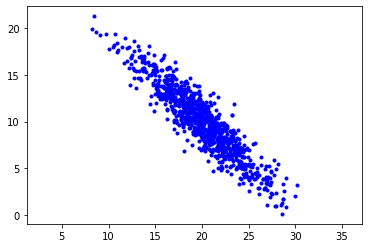

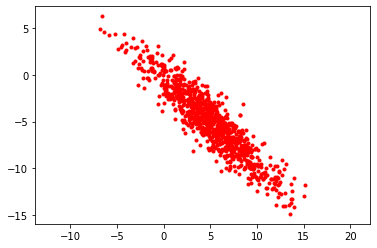

In [5]:
#Load data from 'eigendata.txt' file and store as numpy array in X
X = np.loadtxt("eigdata.txt")

#Plot first column vs first row as plot 1
plt.subplot(1,1,1)
plt.plot(X[:,0],X[:,1],'b.')
plt.axis('equal')
plt.show()

#Plot mean-subtract data as plot 2
m = np.mean(X)
a,b = X.shape
Y = X - np.ones((a,1))*m
plt.subplot(1,1,1)
plt.plot(Y[:,0],Y[:,1],'r.')
plt.axis('equal')
plt.show()

### Discussion

Successfully able to read data from given text file, store the values in X, plot the data present inside X and plot mean shifted data Y using relevant python functions

## Question 3

Lenght of axis 1 and axis 2 are: 
14.731906093236422 3.0197483581527385


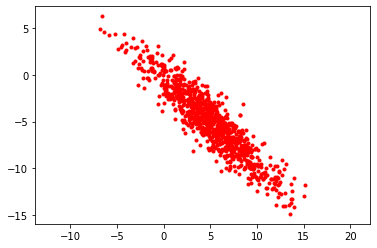

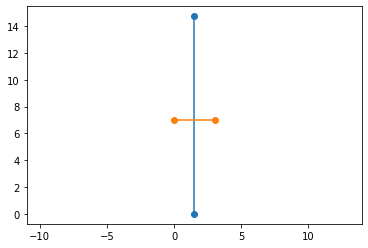

In [6]:
import matplotlib

K = np.cov(Y.transpose(), bias=True)    #Generate covariance matrix for Y
K_inv = np.linalg.inv(K)

V,U=eig(K)                 #eig() function returns Eigen Values (V) and Eigen Vector (U) respectively using covariance K

xm = np.mean((Y[:,0]))
ym = np.mean((Y[:,1]))    #Computes x and y coordinates of mean of Y

C = 9

axis1 = math.sqrt(C) * (math.sqrt(V.max()))
axis2 = math.sqrt(C) * (math.sqrt(V.min()))
print("Lenght of axis 1 and axis 2 are: ")
print(axis1,axis2)

plt.subplot(1,1,1)
plt.plot(Y[:,0],Y[:,1],'r.')
plt.axis('equal')
plt.show()


x1, y1 = [(axis2)/2,(axis2)/2], [0,axis1]
x2, y2 = [0,axis2], [(axis1)//2,(axis1)//2]

plt.plot(x1, y1, x2, y2, marker = 'o')
plt.axis('equal')
plt.show()



### Discussion

I used covariance matrix (K) to generate eigen values (V) and eigen vectors (U) of the given mean shifted data (Y). Since covariance matrix was used, the lamda obtained from V is enough to calculate the length of axis ((C*lamda)^0.5). If I had taken inverse covariance matrix (K^-1), I would have to invert the lamda to get axis lenghth (((C/lamda)^0.5).
Since there are #3 standard deviations, we take C=9 to calculate the axis length. After getting the lengths (14.731,3.019), I drew mutually perpendicular lines, as shown above, that acts as 2-D Gaussian ellipse axis.

### Question 4

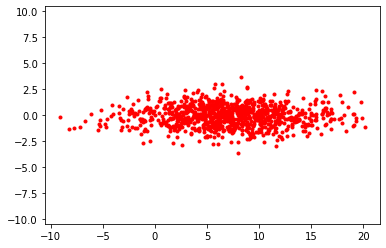

In [7]:
rotatedData = np.zeros((1000,2))                         #Create an empty matrix to store rotated values of Y
i = 0
for dataValue in Y:                                      #Creating a loop to multiply each data point in R with Eigen vector (U) and store rotated value in new empty matrix rotatedData
    rotatedData[i] = np.dot(U.transpose(),dataValue)
    i+=1
plt.plot(rotatedData[:,0], rotatedData[:,1], 'r.')
plt.axis('equal')
plt.show()


### Discussion

The transpose of eigen vector matrix acts as a rotation matrix. I applied dot product between transpose of eigen vector and each data point in Y which gives us uncorrelated/rotated data

### Question 5

(-32.17857863012391, 15.73148498523162, 0.0, 29.4)

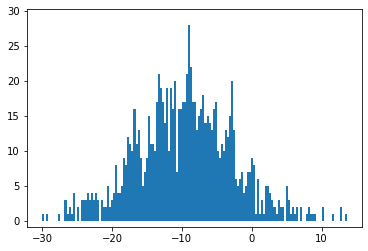

In [8]:
projectedData = np.zeros((1000,1))
i = 0
for dataValue in Y:
    projectedData[i] = np.dot(Y[0],dataValue)
    i += 1
plt.hist(projectedData,bins=150)
plt.axis('equal')

### Discussion

I projected the values from mean shifted data (Y) onto the eigen vector corresponding the largest eigen value of covariance matrix (K). Plotted histogram looks like a 1-D Gaussian.